In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/trylitics-data/sales.csv'
data = pd.read_csv(file_path)

# Convert BUSINESS_DATE to datetime
data['BUSINESS_DATE'] = pd.to_datetime(data['BUSINESS_DATE'])

# Aggregate net sales by date
time_series_data = data.groupby('BUSINESS_DATE')['NET_SALES_FINAL_USD_AMOUNT'].sum().reset_index()

# Rename columns for Prophet
time_series_data.columns = ['ds', 'y']

time_series_data.head()


,ds,y
0,2019-04-23,757526.40
1,2019-04-24,793402.19
2,2019-04-25,971223.32
3,2019-04-26,1267928.99
4,2019-04-27,1173166.81


In [4]:
data.head()

,STORE_KEY,STORE_NUMBER,OPEN_DATE,BUSINESS_DATE_KEY,BUSINESS_DATE,TEMP_CLOSE_INDICATOR,PROJECTION_INCLUDED_INDICATOR,BUSINESS_DATE_FISCAL_DAY_OF_YEAR,BUSINESS_DATE_FISCAL_YEAR,COMP_BUSINESS_DATE_FISCAL_YEAR,COMPARABLE_INDICATOR,TRANSACTION_FINAL_COUNT,NET_SALES_FINAL_USD_AMOUNT,PY_TRANSACTION_FINAL_COUNT,PY_NET_SALES_FINAL_USD_AMOUNT
0,1402,580,10/5/2011,20230203,2023-02-03,0.0,0,34,2023,2022,1,201,4161.75,144,2752.42
1,2104,1323,11/21/2017,20221008,2022-10-08,0.0,0,287,2022,2021,1,249,5785.30,166,4407.43
2,1753,969,2/6/2006,20230330,2023-03-30,0.0,0,89,2023,2022,1,258,5695.29,254,5930.04
3,2443,1664,2/3/2020,20230307,2023-03-07,0.0,0,66,2023,2022,1,296,6597.23,153,3726.12
4,1859,1078,3/11/2016,20221105,2022-11-05,0.0,0,315,2022,2021,1,188,4100.34,146,3504.75


In [5]:
# Import the necessary library
from prophet import Prophet

# Initialize the Prophet model
model = Prophet()

# Fit the model on the entire dataset
model.fit(time_series_data)


17:19:36 - cmdstanpy - INFO - Chain [1] start processing
17:19:36 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
# Define the split point
train_size = int(len(time_series_data) * 0.8)  # 80% train, 20% test

# Split into training and testing sets
train_data = time_series_data[:train_size]
test_data = time_series_data[train_size:]
model = Prophet()
model.fit(train_data)

17:19:43 - cmdstanpy - INFO - Chain [1] start processing
17:19:43 - cmdstanpy - INFO - Chain [1] done processing


/opt/conda/lib/python3.10/site-packages/prophet/plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


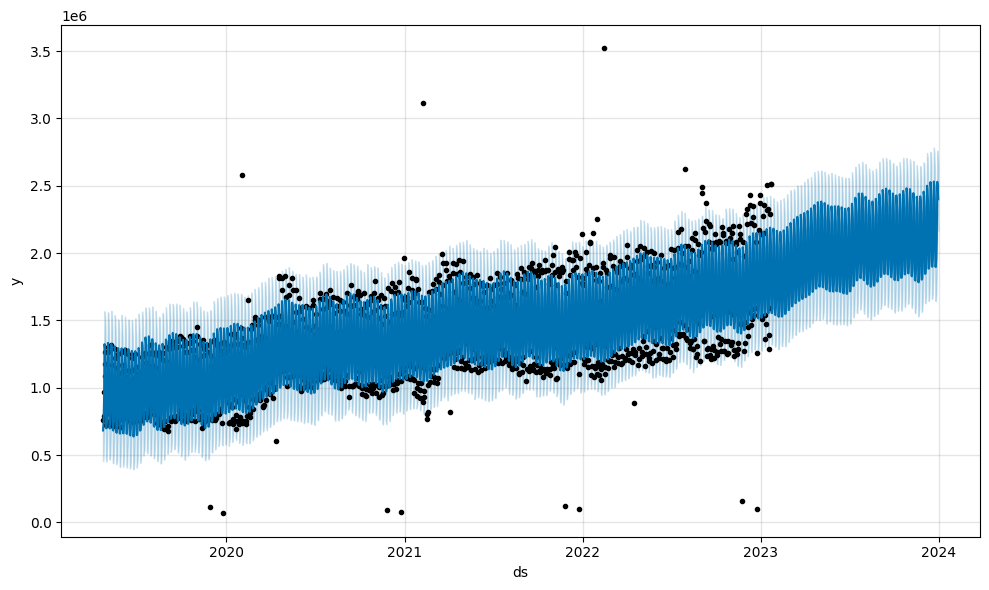

,ds,yhat,yhat_lower,yhat_upper
1624,2023-10-03,1.799230e+06,1.557279e+06,2.028639e+06
1625,2023-10-04,1.850977e+06,1.621361e+06,2.081402e+06
1626,2023-10-05,1.993598e+06,1.755546e+06,2.212849e+06
1627,2023-10-06,2.428015e+06,2.198078e+06,2.648584e+06
1628,2023-10-07,2.393114e+06,2.159747e+06,2.624729e+06
...,...,...,...,...
1709,2023-12-27,1.949826e+06,1.694327e+06,2.186169e+06
1710,2023-12-28,2.093602e+06,1.874291e+06,2.342767e+06
1711,2023-12-29,2.528914e+06,2.285642e+06,2.760583e+06
1712,2023-12-30,2.494661e+06,2.255013e+06,2.721714e+06


In [9]:
# Create a DataFrame for future dates
import matplotlib.pyplot as plt
future_dates = model.make_future_dataframe(periods=90)  # 60 days for the next two months

# Predict the future sales
forecast = model.predict(time_series_data)

# Plot the forecast
model.plot(forecast)
plt.show()

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(90)


/opt/conda/lib/python3.10/site-packages/prophet/plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


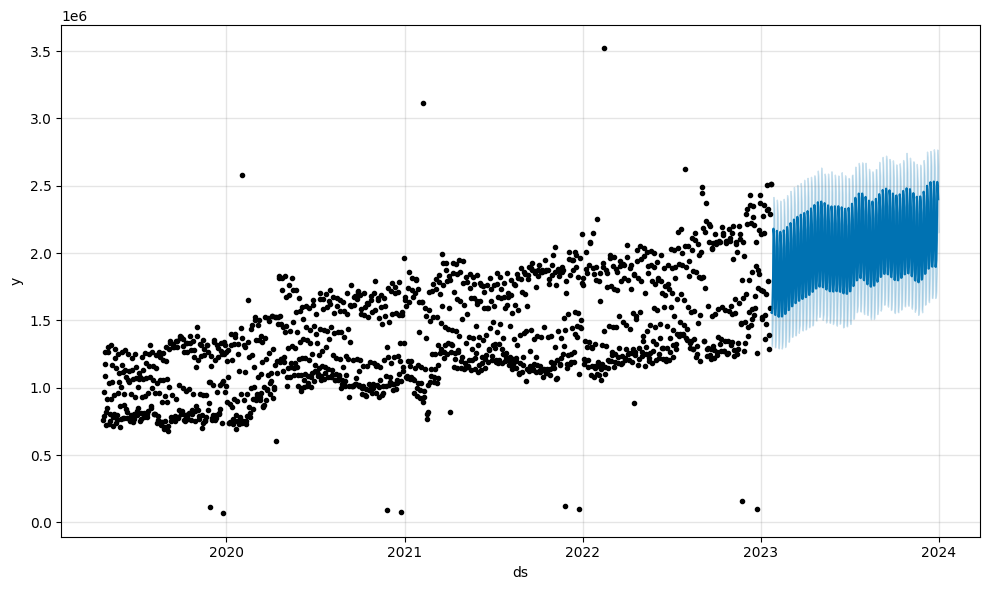

,ds,yhat,yhat_lower,yhat_upper
283,2023-11-02,2.042377e+06,1.802997e+06,2.271246e+06
284,2023-11-03,2.474912e+06,2.243739e+06,2.708182e+06
285,2023-11-04,2.437107e+06,2.201236e+06,2.670898e+06
286,2023-11-05,2.338321e+06,2.093886e+06,2.577323e+06
287,2023-11-06,1.833677e+06,1.600829e+06,2.058888e+06
288,2023-11-07,1.826904e+06,1.586552e+06,2.054448e+06
289,2023-11-08,1.875769e+06,1.626445e+06,2.133329e+06
290,2023-11-09,2.014917e+06,1.789639e+06,2.262391e+06
291,2023-11-10,2.445336e+06,2.214970e+06,2.681453e+06
292,2023-11-11,2.405987e+06,2.174306e+06,2.671766e+06


In [10]:
# Create a DataFrame for future dates
import matplotlib.pyplot as plt
future_dates = model.make_future_dataframe(periods=60)  # 60 days for the next two months

# Predict the future sales
forecast = model.predict(test_data)

# Plot the forecast
model.plot(forecast)
plt.show()

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(60)


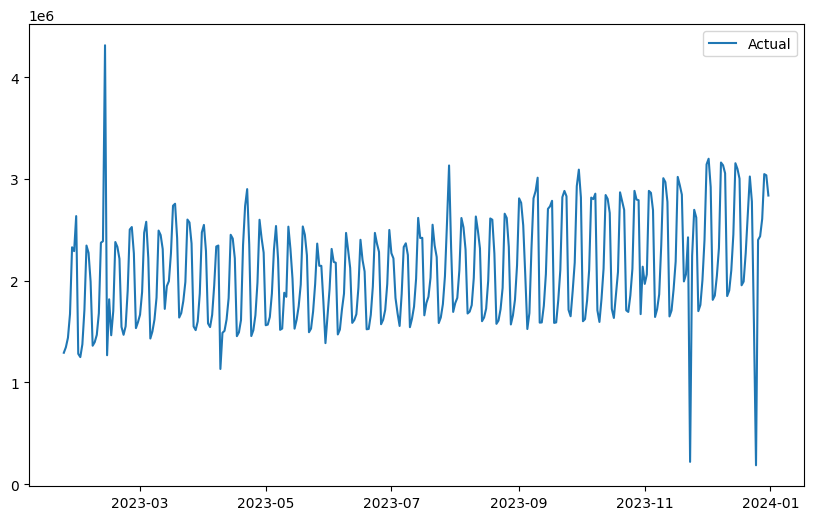

In [22]:
# Assuming actual_data is a DataFrame with actual sales data for the forecasted period
actual_data = pd.read_csv('/kaggle/input/trylitics-data/sales.csv')
actual_data['BUSINESS_DATE'] = pd.to_datetime(actual_data['BUSINESS_DATE'])
actual_data = actual_data.groupby('BUSINESS_DATE')['NET_SALES_FINAL_USD_AMOUNT'].sum().reset_index()
actual_data.columns = ['ds', 'actual']

# Merge actual and forecast data
forecast_with_actual = pd.merge(forecast[['ds', 'yhat']], actual_data, on='ds', how='left')

# Plot actual vs forecast
plt.figure(figsize=(10, 6))
plt.plot(forecast_with_actual['ds'], forecast_with_actual['actual'], label='Actual')
# plt.plot(forecast_with_actual['ds'], forecast_with_actual['yhat'], label='Forecast')
plt.legend()
plt.show()


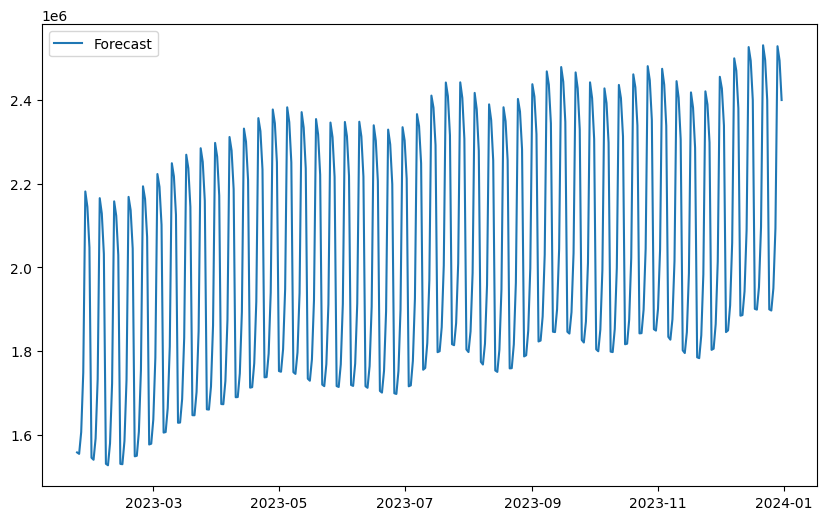

In [23]:
# Assuming actual_data is a DataFrame with actual sales data for the forecasted period
actual_data = pd.read_csv('/kaggle/input/trylitics-data/sales.csv')
actual_data['BUSINESS_DATE'] = pd.to_datetime(actual_data['BUSINESS_DATE'])
actual_data = actual_data.groupby('BUSINESS_DATE')['NET_SALES_FINAL_USD_AMOUNT'].sum().reset_index()
actual_data.columns = ['ds', 'actual']

# Merge actual and forecast data
forecast_with_actual = pd.merge(forecast[['ds', 'yhat']], actual_data, on='ds', how='left')

# Plot actual vs forecast
plt.figure(figsize=(10, 6))
# plt.plot(forecast_with_actual['ds'], forecast_with_actual['actual'], label='Actual')
plt.plot(forecast_with_actual['ds'], forecast_with_actual['yhat'], label='Forecast')
plt.legend()
plt.show()


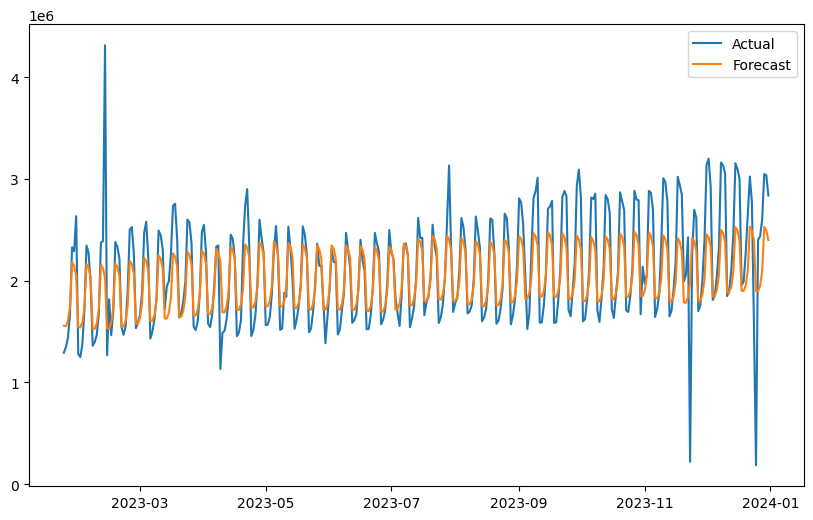

In [24]:
# Assuming actual_data is a DataFrame with actual sales data for the forecasted period
actual_data = pd.read_csv('/kaggle/input/trylitics-data/sales.csv')
actual_data['BUSINESS_DATE'] = pd.to_datetime(actual_data['BUSINESS_DATE'])
actual_data = actual_data.groupby('BUSINESS_DATE')['NET_SALES_FINAL_USD_AMOUNT'].sum().reset_index()
actual_data.columns = ['ds', 'actual']

# Merge actual and forecast data
forecast_with_actual = pd.merge(forecast[['ds', 'yhat']], actual_data, on='ds', how='left')

# Plot actual vs forecast
plt.figure(figsize=(10, 6))
plt.plot(forecast_with_actual['ds'], forecast_with_actual['actual'], label='Actual')
plt.plot(forecast_with_actual['ds'], forecast_with_actual['yhat'], label='Forecast')
plt.legend()
plt.show()


evaluation...


In [15]:
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/trylitics-data/sales.csv'
data = pd.read_csv(file_path)

# Convert BUSINESS_DATE to datetime
data['BUSINESS_DATE'] = pd.to_datetime(data['BUSINESS_DATE'])

# Aggregate net sales by date
time_series_data = data.groupby('BUSINESS_DATE')['NET_SALES_FINAL_USD_AMOUNT'].sum().reset_index()

# Rename columns for Prophet
time_series_data.columns = ['ds', 'y']

time_series_data.head()


,ds,y
0,2019-04-23,757526.40
1,2019-04-24,793402.19
2,2019-04-25,971223.32
3,2019-04-26,1267928.99
4,2019-04-27,1173166.81


In [16]:
# Define the split point
train_size = int(len(time_series_data) * 0.8)  # 80% train, 20% test

# Split into training and testing sets
train_data = time_series_data[:train_size]
test_data = time_series_data[train_size:]

train_data.shape, test_data.shape


((1371, 2), (343, 2))

In [17]:
from prophet import Prophet

# Initialize and fit the Prophet model on the training data
model = Prophet()
model.fit(train_data)


18:38:13 - cmdstanpy - INFO - Chain [1] start processing
18:38:13 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
# # Create future dataframe for both training and testing period
# train_forecast = model.make_future_dataframe(periods=0)  # For training period
# test_forecast = model.make_future_dataframe(periods=len(test_data))  # For testing period

# # Predict on the training data
train_pred = model.predict(train_data)

# # Predict on the testing data
test_pred = model.predict(test_data)

# Extract actual and predicted values
train_actual = train_data['y'].values
train_predicted = train_pred['yhat'].values  # only the training period predictions

test_actual = test_data['y'].values
test_predicted = test_pred['yhat'].values  # only the testing period predictions


In [14]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Calculate Train MAPE
train_mape = mean_absolute_percentage_error(train_actual, train_predicted) * 100

# Calculate Test MAPE
test_mape = mean_absolute_percentage_error(test_actual, test_predicted) * 100

# Calculate Train RMSE
train_rmse = np.sqrt(mean_squared_error(train_actual, train_predicted))

# Calculate Test RMSE
test_rmse = np.sqrt(mean_squared_error(test_actual, test_predicted))

train_mape, test_mape, train_rmse, test_rmse


(14.934496789590728, 14.423540972233681, 182458.79187457115, 323874.0197077363)

17:34:59 - cmdstanpy - INFO - Chain [1] start processing
17:34:59 - cmdstanpy - INFO - Chain [1] done processing
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


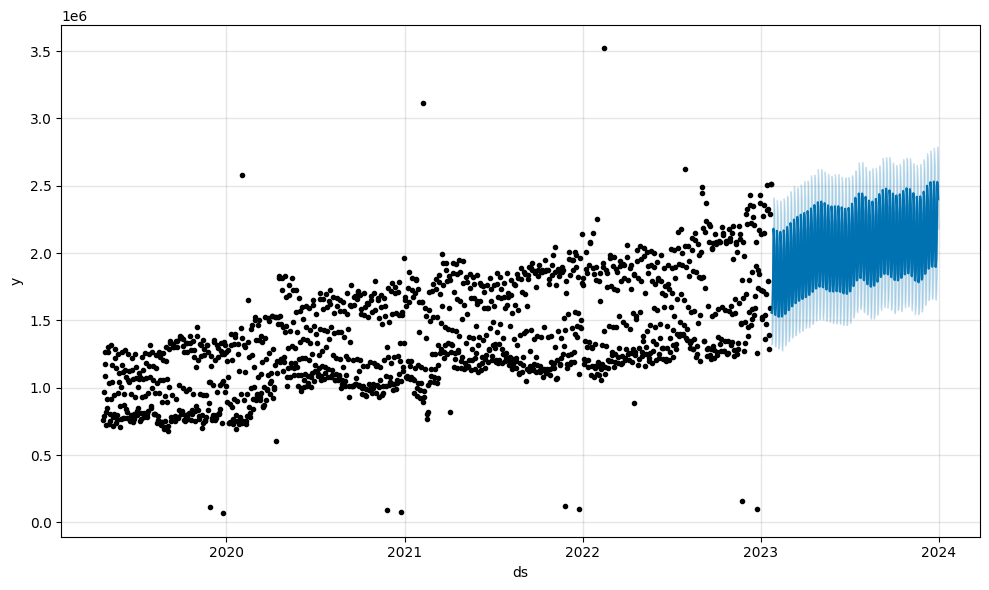

Mean Absolute Percentage Error (MAPE): 14.42%


,ds,yhat,yhat_lower,yhat_upper
283,2023-11-02,2.042377e+06,1.820892e+06,2.264429e+06
284,2023-11-03,2.474912e+06,2.247834e+06,2.704491e+06
285,2023-11-04,2.437107e+06,2.206836e+06,2.677190e+06
286,2023-11-05,2.338321e+06,2.112089e+06,2.587511e+06
287,2023-11-06,1.833677e+06,1.607455e+06,2.071617e+06
288,2023-11-07,1.826904e+06,1.573185e+06,2.054287e+06
289,2023-11-08,1.875769e+06,1.649847e+06,2.110006e+06
290,2023-11-09,2.014917e+06,1.802923e+06,2.250189e+06
291,2023-11-10,2.445336e+06,2.216350e+06,2.666461e+06
292,2023-11-11,2.405987e+06,2.168237e+06,2.627023e+06


In [26]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

# Load the dataset
file_path = '/kaggle/input/trylitics-data/sales.csv'
data = pd.read_csv(file_path)

# Convert BUSINESS_DATE to datetime
data['BUSINESS_DATE'] = pd.to_datetime(data['BUSINESS_DATE'])

# Aggregate net sales by date
time_series_data = data.groupby('BUSINESS_DATE')['NET_SALES_FINAL_USD_AMOUNT'].sum().reset_index()

# Rename columns for Prophet
time_series_data.columns = ['ds', 'y']

# Split the data into training and test sets
train_size = int(len(time_series_data) * 0.80)
train_data = time_series_data[:train_size]
test_data = time_series_data[train_size:]

# Initialize the Prophet model
model = Prophet()

# Fit the model on the training dataset
model.fit(train_data)

# Create a DataFrame for future dates including the test period
# future_dates = model.make_future_dataframe(periods=len(test_data))

# Predict the future sales
forecast = model.predict(test_data)

# Plot the forecast
model.plot(forecast)
plt.show()

# Evaluate the model on the test set
y_true = test_data['y'].values
y_pred = forecast['yhat'].tail(len(test_data)).values

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_true, y_pred)
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2%}')

# Display the forecast for the next 60 days
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(60)


In [27]:
test_rmse = np.sqrt(mean_squared_error(y_true, y_pred))

In [28]:
test_rmse

323874.0197077363

breakdown to storeID

In [35]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

# Load the dataset
file_path = '/kaggle/input/trylitics-data/sales.csv'
data = pd.read_csv(file_path)

# Convert BUSINESS_DATE to datetime
data['BUSINESS_DATE'] = pd.to_datetime(data['BUSINESS_DATE'])

# Get the unique store IDs
unique_store_ids = data['STORE_KEY'].unique()

print(len(unique_store_ids))


477


In [39]:
data

,STORE_KEY,STORE_NUMBER,OPEN_DATE,BUSINESS_DATE_KEY,BUSINESS_DATE,TEMP_CLOSE_INDICATOR,PROJECTION_INCLUDED_INDICATOR,BUSINESS_DATE_FISCAL_DAY_OF_YEAR,BUSINESS_DATE_FISCAL_YEAR,COMP_BUSINESS_DATE_FISCAL_YEAR,COMPARABLE_INDICATOR,TRANSACTION_FINAL_COUNT,NET_SALES_FINAL_USD_AMOUNT,PY_TRANSACTION_FINAL_COUNT,PY_NET_SALES_FINAL_USD_AMOUNT
0,1402,580,10/5/2011,20230203,2023-02-03,0.0,0,34,2023,2022,1,201,4161.75,144,2752.42
1,2104,1323,11/21/2017,20221008,2022-10-08,0.0,0,287,2022,2021,1,249,5785.30,166,4407.43
2,1753,969,2/6/2006,20230330,2023-03-30,0.0,0,89,2023,2022,1,258,5695.29,254,5930.04
3,2443,1664,2/3/2020,20230307,2023-03-07,0.0,0,66,2023,2022,1,296,6597.23,153,3726.12
4,1859,1078,3/11/2016,20221105,2022-11-05,0.0,0,315,2022,2021,1,188,4100.34,146,3504.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632192,1908,1127,11/30/2015,20231127,2023-11-27,0.0,0,331,2023,2022,1,64,1420.22,24,375.50
632193,2268,1489,6/30/2018,20231014,2023-10-14,1.0,0,287,2023,2022,1,0,0.00,45,868.12
632194,1929,1148,4/27/2016,20231111,2023-11-11,0.0,0,315,2023,2022,1,85,2537.98,80,2047.87
632195,2411,1632,5/19/2019,20221109,2022-11-09,0.0,0,319,2022,2021,1,153,920.83,197,1275.38


In [46]:
test_data

,ds,y
1371,2023-01-23,3839.52
1372,2023-01-24,3987.13
1373,2023-01-25,4263.33
1374,2023-01-26,4565.45
1375,2023-01-27,6131.56
...,...,...
1709,2023-12-27,5164.51
1710,2023-12-28,6499.51
1711,2023-12-29,7080.26
1712,2023-12-30,6421.28


In [60]:

# Dictionary to store forecasts and evaluation metrics for each store
store_forecasts = {}
store_metrics = {}


for store_id in unique_store_ids:
    # Filter the data for the current store
    store_data = data[data['STORE_KEY'] == store_id]
    # Calculate and print the sum of TRANSACTION_FINAL_COUNT for the current store
    transaction_sum = store_data['TRANSACTION_FINAL_COUNT'].sum()
    print(f'Store {store_id} - Sum of TRANSACTION_FINAL_COUNT: {transaction_sum}')
    
    # Aggregate net sales by date
    time_series_data = store_data.groupby('BUSINESS_DATE')['NET_SALES_FINAL_USD_AMOUNT'].sum().reset_index()
    
    # Rename columns for Prophet
    time_series_data.columns = ['ds', 'y']
    
    # Split the data into training and test sets
    train_size = int(len(time_series_data) * 0.8)
    train_data = time_series_data[:train_size]
    test_data = time_series_data[train_size:]
    
    # Initialize the Prophet model
    model = Prophet()
    
    # Fit the model on the training dataset
    model.fit(train_data)
    
    # Create a DataFrame for future dates including the test period
    future_dates = model.make_future_dataframe(periods=len(test_data) + 90)  # 60 days for the next two months
    
    # Predict the future sales
    forecast = model.predict(test_data)
    
    # Evaluate the model on the test set
    y_true = test_data['y'].values
    y_pred = forecast['yhat'].iloc[:len(test_data)].values
    
    # Calculate Mean Absolute Percentage Error (MAPE)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    
    # Store the forecast and metrics
    store_forecasts[store_id] = forecast
    store_metrics[store_id] = {'MAPE': mape}
    
    # Plot the forecast
    model.plot(forecast)
    plt.title(f'Sales Forecast for Store {store_id}')
    plt.show()
    
    # Print the evaluation metric
    print(f'Store {store_id} - Mean Absolute Percentage Error (MAPE): {mape:.2%}')
    
# Print the overall metrics
print(store_metrics)

# Example: Accessing forecast data for a specific store
example_store_id = unique_store_ids[0]
forecast_example = store_forecasts[example_store_id]
forecast_example[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(90)


19:07:27 - cmdstanpy - INFO - Chain [1] start processing


Store 1402 - Sum of TRANSACTION_FINAL_COUNT: 255010


19:07:28 - cmdstanpy - INFO - Chain [1] done processing


x= 2539.74


IndexingError: Too many indexers

In [57]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-01-23,3519.291625,1962.539187,4184.819346,3519.291625,3519.291625,-418.081090,-418.081090,-418.081090,-480.379229,-480.379229,-480.379229,62.298139,62.298139,62.298139,0.0,0.0,0.0,3101.210535
1,2023-01-24,3525.930503,2275.004317,4255.213283,3525.930503,3525.930503,-299.344609,-299.344609,-299.344609,-375.173229,-375.173229,-375.173229,75.828620,75.828620,75.828620,0.0,0.0,0.0,3226.585893
2,2023-01-25,3532.569380,2278.398901,4401.031675,3532.569380,3532.569380,-171.166946,-171.166946,-171.166946,-256.193592,-256.193592,-256.193592,85.026646,85.026646,85.026646,0.0,0.0,0.0,3361.402435
3,2023-01-26,3539.208258,2362.438440,4469.066272,3539.208258,3539.208258,-65.842263,-65.842263,-65.842263,-155.571277,-155.571277,-155.571277,89.729014,89.729014,89.729014,0.0,0.0,0.0,3473.365995
4,2023-01-27,3545.847136,3256.304884,5331.647291,3545.847136,3545.847136,720.674285,720.674285,720.674285,630.793275,630.793275,630.793275,89.881010,89.881010,89.881010,0.0,0.0,0.0,4266.521421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,2023-12-27,5763.232264,4145.351556,6344.936392,5362.070370,6133.905519,-438.910100,-438.910100,-438.910100,-256.193592,-256.193592,-256.193592,-182.716508,-182.716508,-182.716508,0.0,0.0,0.0,5324.322164
339,2023-12-28,5769.871141,4272.614331,6528.569659,5367.413640,6140.823590,-366.113918,-366.113918,-366.113918,-155.571277,-155.571277,-155.571277,-210.542641,-210.542641,-210.542641,0.0,0.0,0.0,5403.757223
340,2023-12-29,5776.510019,5040.308598,7280.932010,5371.298322,6147.700282,393.782187,393.782187,393.782187,630.793275,630.793275,630.793275,-237.011088,-237.011088,-237.011088,0.0,0.0,0.0,6170.292206
341,2023-12-30,5783.148896,4974.000632,7267.760701,5375.561352,6154.562894,338.235334,338.235334,338.235334,599.797266,599.797266,599.797266,-261.561931,-261.561931,-261.561931,0.0,0.0,0.0,6121.384231


In [50]:
y_true

array([2539.74, 2343.77, 2957.09, 3620.13, 4060.43, 4078.9 , 4923.39,
       2684.62, 1110.8 , 1728.39, 4461.23, 4161.75, 4480.93, 3697.46,
       3282.85, 2962.19, 3362.05, 3293.8 , 4393.  , 5093.27, 5888.42,
       2322.39, 2872.14, 2940.48, 3371.52, 4614.33, 4351.71, 4347.1 ,
       2735.21, 3308.3 , 3867.28, 3970.57, 5704.36, 4781.65, 4708.93,
       4080.75, 3228.88, 3425.1 , 4026.64, 5311.57, 4993.69, 4042.88,
       3395.73, 3379.16, 3156.91, 3619.89, 5023.14, 4622.99, 4087.04,
       3893.69, 4779.06, 5271.62, 5696.73, 6134.31, 5278.  , 4715.9 ,
       3536.4 , 3849.07, 4471.43, 4375.79, 6132.3 , 5094.57, 4448.47,
       3604.91, 3407.29, 3686.12, 4064.97, 4988.41, 5080.8 , 4832.49,
       3928.8 , 3123.5 , 3632.17, 4510.96, 5642.69, 4211.33, 3026.83,
       3482.79, 3137.4 , 4089.74, 4432.44, 4731.25, 5147.11, 4748.03,
       3180.95, 3185.73, 3673.09, 5811.27, 6266.02, 5848.05, 5488.85,
       3920.19, 3312.85, 4417.64, 4065.08, 4900.07, 5472.8 , 4499.59,
       3407.1 , 3675

In [49]:
y_pred

array([3101.21053481, 3226.58589341, 3361.40243454, 3473.36599487,
       4266.52142053, 4237.82117048, 3672.71533093, 3149.51163574,
       3244.92470535, 3350.87255066, 3435.75876087, 4204.28254162,
       4153.99118945, 3570.85550098, 3033.61708737, 3119.3271299 ,
       3220.13488684, 3304.56456696, 4077.32286065, 4035.85176365,
       3465.90716554, 2945.9120716 , 3052.50382096, 3177.33337163,
       3288.35496866, 4089.64813655, 4077.98624035, 3538.43166673,
       3048.70605499, 3184.75449604, 3337.5613312 , 3474.45544669,
       4298.94661358, 4307.30676615, 3784.17596753, 3306.94124648,
       3451.30703984, 3608.11475584, 3744.64930631, 4564.47417903,
       4564.00903217, 4028.12971279, 3534.53909454, 3659.32773271,
       3793.78215818, 3905.67899882, 4699.10686385, 4671.03034991,
       4106.87644968, 3584.89212791, 3681.69241323, 3789.0571482 ,
       3875.21486939, 4644.65599065, 4594.68983482, 4011.02592535,
       3472.12837524, 3554.762735  , 3650.79339715, 3728.46992

In [52]:
mape

array([3186.95476892, 3045.39178951, 2920.60235072, 2136.27703558,
       2137.9089204 , 2650.49621394, 3122.42724002, 2992.23341168,
       2849.88048183, 2726.96065084, 1949.89134895, 1957.39058981,
       2475.07165246, 2957.17017844, 2841.15128514, 2715.37604355,
       2610.78534892, 1856.93138289, 1885.81807998, 2424.87618304,
       2931.39979272, 2840.7640479 , 2740.43139282, 2661.04464372,
       1929.4363939 , 1981.19121948, 2544.73371339, 3071.8293088 ,
       2998.20892535, 2911.9550818 , 2844.14338132, 2116.94141509,
       2174.28779717, 2742.74139394, 3269.14733803, 3190.27697026,
       3095.57243825, 3015.94702073, 2272.1410709 , 2313.48708465,
       2865.49688995, 3372.95905049, 3273.45550051, 3157.66677808,
       3057.0045108 , 2292.32525932, 2314.51524346, 2848.558062  ,
       3339.62356929, 3225.93456586, 3098.31585567, 2988.35052324,
       2218.3441568 , 2236.55039533, 2768.14617096, 3259.62442916,
       3149.00589424, 3026.33147609, 2922.82619227, 2161.43241

19:10:14 - cmdstanpy - INFO - Chain [1] start processing


Store 1402 - Sum of TRANSACTION_FINAL_COUNT: 255010


19:10:14 - cmdstanpy - INFO - Chain [1] done processing
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


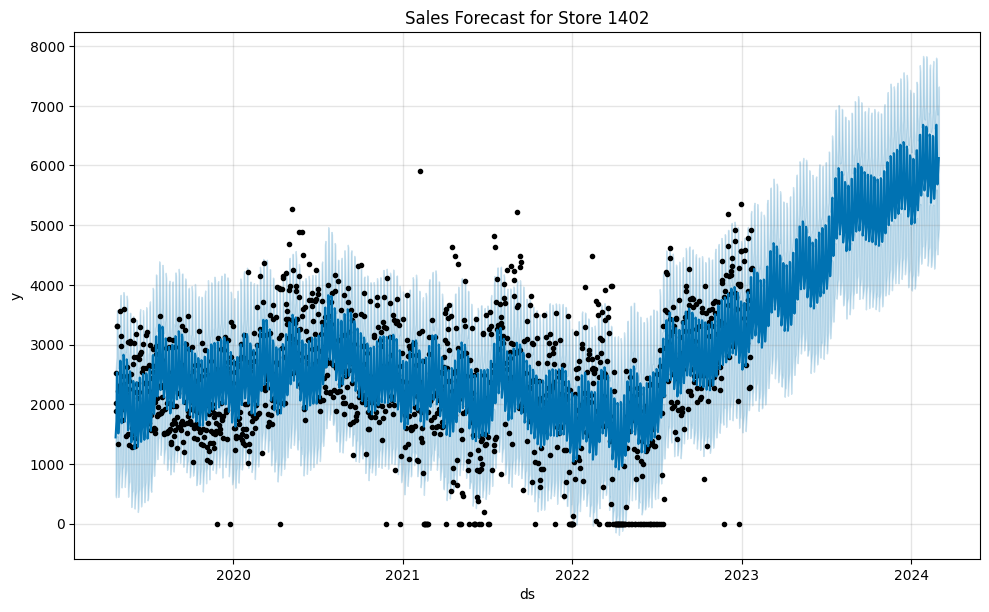

19:10:15 - cmdstanpy - INFO - Chain [1] start processing


Store 1402 - Mean Absolute Percentage Error (MAPE): 12671191863715485696.00%
Store 2104 - Sum of TRANSACTION_FINAL_COUNT: 279691


19:10:16 - cmdstanpy - INFO - Chain [1] done processing
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


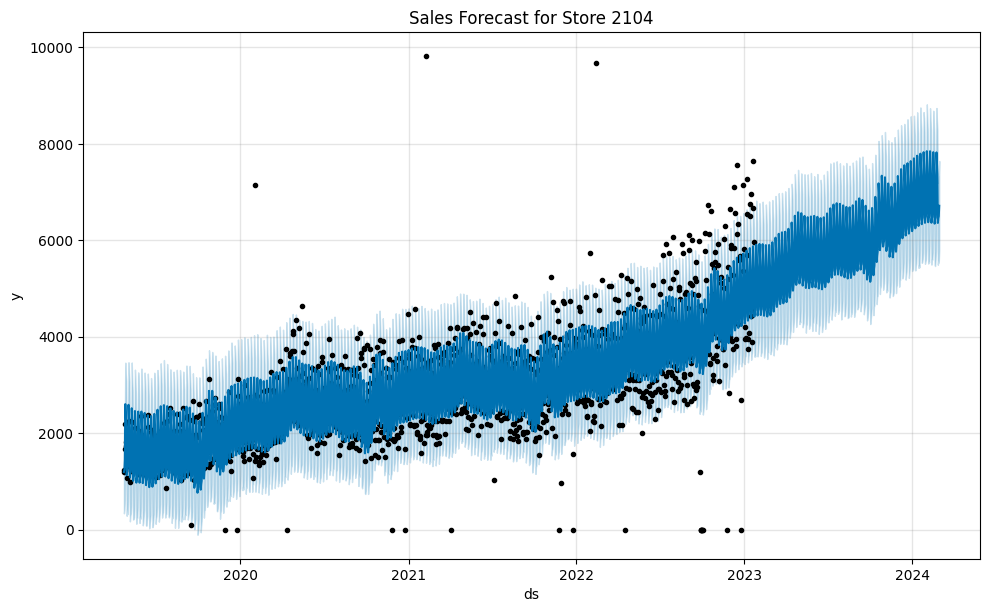

19:10:18 - cmdstanpy - INFO - Chain [1] start processing


Store 2104 - Mean Absolute Percentage Error (MAPE): 7878917961558225920.00%
Store 1753 - Sum of TRANSACTION_FINAL_COUNT: 489681


19:10:18 - cmdstanpy - INFO - Chain [1] done processing
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


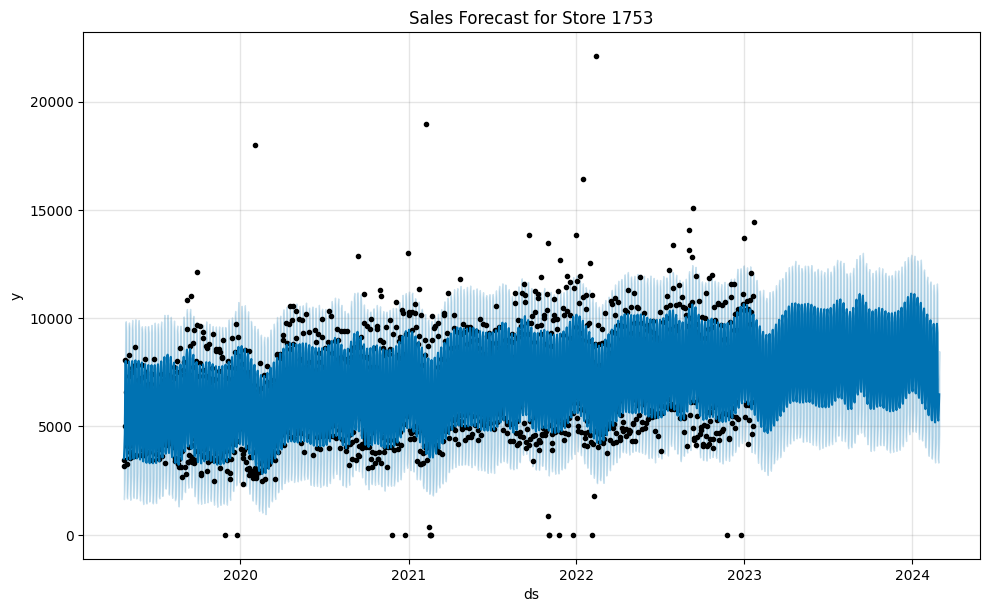

19:10:19 - cmdstanpy - INFO - Chain [1] start processing


Store 1753 - Mean Absolute Percentage Error (MAPE): 25482422800513351680.00%
Store 2443 - Sum of TRANSACTION_FINAL_COUNT: 378472


19:10:19 - cmdstanpy - INFO - Chain [1] done processing
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


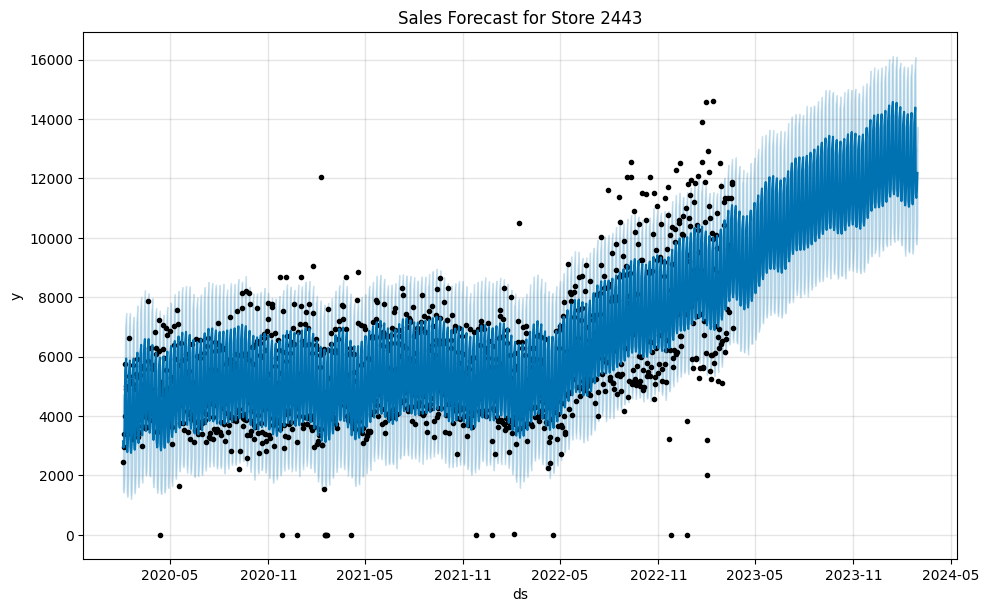

19:10:21 - cmdstanpy - INFO - Chain [1] start processing


Store 2443 - Mean Absolute Percentage Error (MAPE): 25195110937991426048.00%
Store 1859 - Sum of TRANSACTION_FINAL_COUNT: 268409


19:10:21 - cmdstanpy - INFO - Chain [1] done processing
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


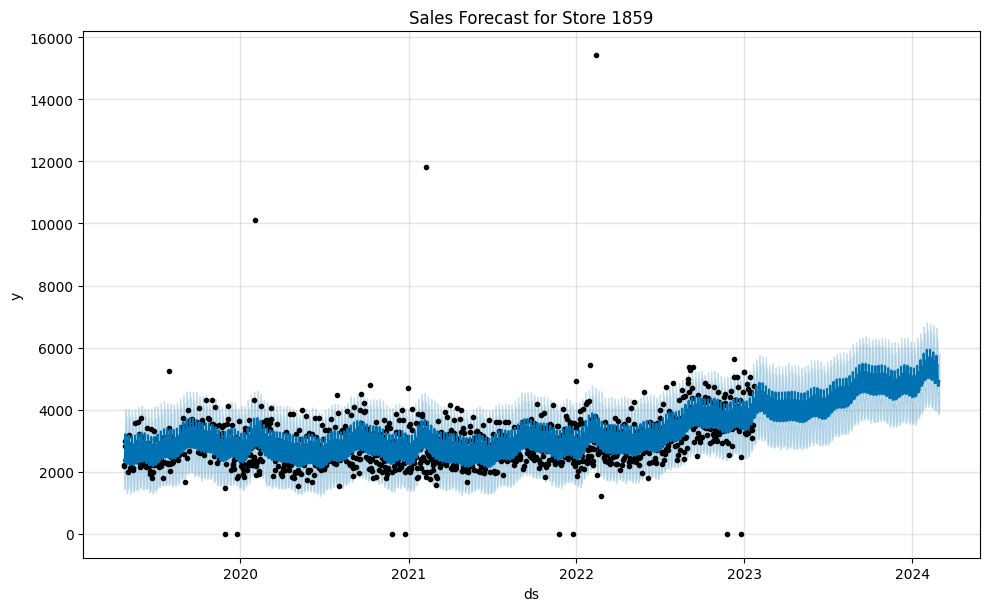

19:10:22 - cmdstanpy - INFO - Chain [1] start processing


Store 1859 - Mean Absolute Percentage Error (MAPE): 7768697590502277120.00%
Store 2255 - Sum of TRANSACTION_FINAL_COUNT: 332768


19:10:22 - cmdstanpy - INFO - Chain [1] done processing
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


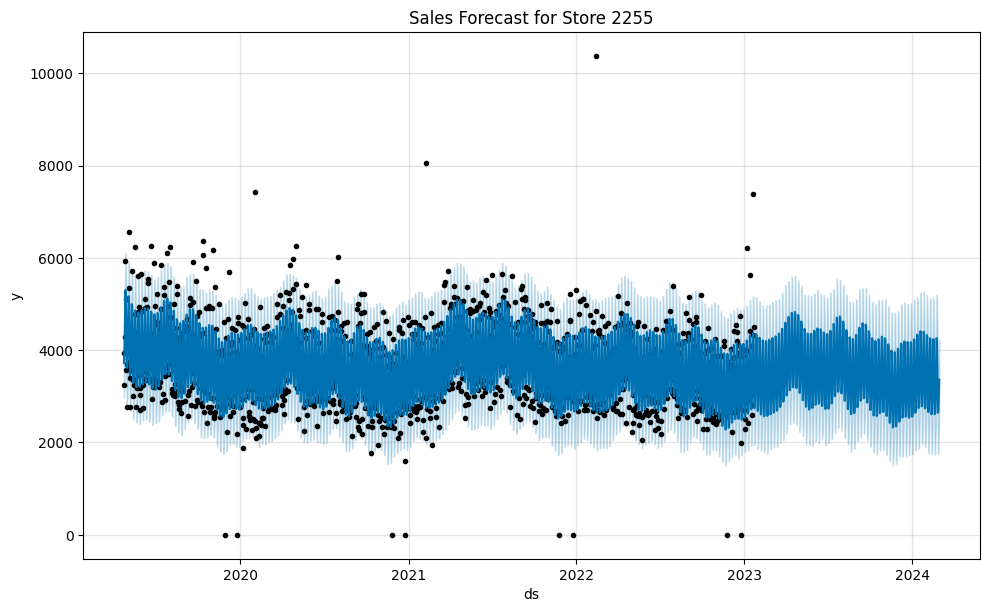

19:10:24 - cmdstanpy - INFO - Chain [1] start processing


Store 2255 - Mean Absolute Percentage Error (MAPE): 9624147976148563968.00%
Store 2439 - Sum of TRANSACTION_FINAL_COUNT: 281199


19:10:24 - cmdstanpy - INFO - Chain [1] done processing
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


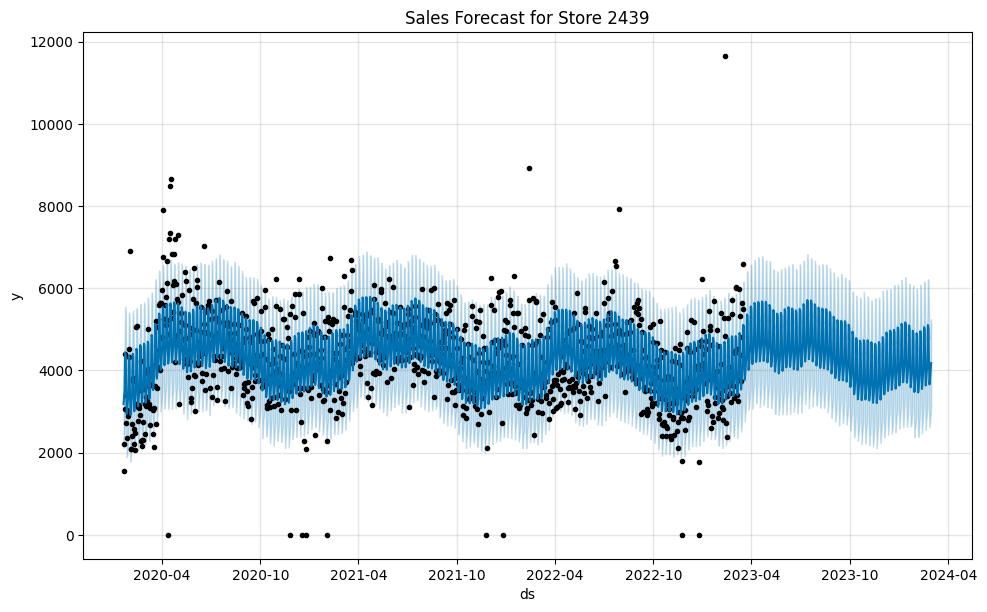

19:10:26 - cmdstanpy - INFO - Chain [1] start processing


Store 2439 - Mean Absolute Percentage Error (MAPE): 185064850291673792512.00%
Store 1805 - Sum of TRANSACTION_FINAL_COUNT: 328885


19:10:26 - cmdstanpy - INFO - Chain [1] done processing


KeyboardInterrupt: 

In [61]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

# Load the dataset
file_path = '/kaggle/input/trylitics-data/sales.csv'
data = pd.read_csv(file_path)

# Convert BUSINESS_DATE to datetime
data['BUSINESS_DATE'] = pd.to_datetime(data['BUSINESS_DATE'])

# Get the unique store IDs
unique_store_ids = data['STORE_KEY'].unique()

# Dictionary to store forecasts and evaluation metrics for each store
store_forecasts = {}
store_metrics = {}

for store_id in unique_store_ids:
    # Filter the data for the current store
    store_data = data[data['STORE_KEY'] == store_id]
    
    # Calculate and print the sum of TRANSACTION_FINAL_COUNT for the current store
    transaction_sum = store_data['TRANSACTION_FINAL_COUNT'].sum()
    print(f'Store {store_id} - Sum of TRANSACTION_FINAL_COUNT: {transaction_sum}')
    
    # Aggregate net sales by date
    time_series_data = store_data.groupby('BUSINESS_DATE')['NET_SALES_FINAL_USD_AMOUNT'].sum().reset_index()
    
    # Rename columns for Prophet
    time_series_data.columns = ['ds', 'y']
    
    # Check for and drop missing values
    time_series_data.dropna(subset=['y'], inplace=True)
    
    # Split the data into training and test sets
    train_size = int(len(time_series_data) * 0.8)
    train_data = time_series_data[:train_size]
    test_data = time_series_data[train_size:]
    
    # Ensure that test data has no missing values
    if test_data['y'].isna().sum() > 0:
        print(f"Skipping store {store_id} due to missing values in test data.")
        continue
    
    # Initialize the Prophet model
    model = Prophet()
    
    # Fit the model on the training dataset
    model.fit(train_data)
    
    # Create a DataFrame for future dates including the test period
    future_dates = model.make_future_dataframe(periods=len(test_data) + 60)  # 60 days for the next two months
    
    # Predict the future sales
    forecast = model.predict(future_dates)
    
    # Align the forecast with test data period
    forecast_test_period = forecast.iloc[:len(test_data)]
    
    # Evaluate the model on the test set
    y_true = test_data['y'].values
    y_pred = forecast_test_period['yhat'].values
    
    # Calculate Mean Absolute Percentage Error (MAPE)
    if y_true.sum() == 0:
        print(f"Skipping MAPE calculation for store {store_id} due to zero sales in test data.")
        mape = None
    else:
        mape = mean_absolute_percentage_error(y_true, y_pred)
    
    # Store the forecast and metrics
    store_forecasts[store_id] = forecast
    store_metrics[store_id] = {'MAPE': mape}
    
    # Plot the forecast
    model.plot(forecast)
    plt.title(f'Sales Forecast for Store {store_id}')
    plt.show()
    
    # Print the evaluation metric
    if mape is not None:
        print(f'Store {store_id} - Mean Absolute Percentage Error (MAPE): {mape:.2%}')
    
# Print the overall metrics
print(store_metrics)

# Example: Accessing forecast data for a specific store
example_store_id = unique_store_ids[0]
forecast_example = store_forecasts[example_store_id]
forecast_example[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(60)
